In [81]:
# Zadanie 1

# Po wybraniu zbioru danych przetestować różne algorytmy do wykrywania communities.
# W sprawozdaniu:
# - opisać zbiór danych (liczba wierzchołków, liczba krawędzi, co reprezentuje),
# - którko opisać wybrane algorytmy do wykrywania communities,
# - załączyć wyniki: wizualizacje communities, dodatkowo liczbę znalezionych communities i ich liczność.
# - odpowiedzieć na pytania: Czy resultaty się od siebie różnią? Co może być tego powodem?

In [82]:
import networkx as nx
import matplotlib.pyplot as plt

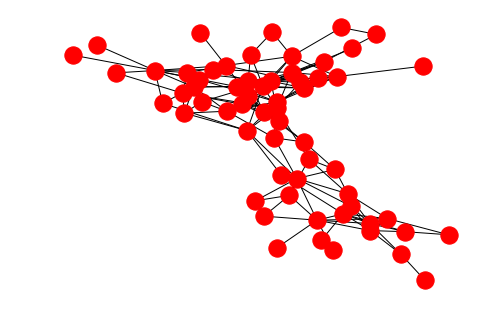

In [83]:
# Wczytywanie grafu z pliku

G = nx.Graph()
edges = nx.read_edgelist('dataset/soc-dolphins/soc-dolphins.mtx')
G.add_edges_from(edges.edges())
nx.draw(G)

In [84]:
from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G)

communities_sum = 0
communities_gn = []

for community_gn in next(communities_iter):
    communities_sum += 1
    communities_gn.append(community_gn)
    print("Community ", communities_sum)
    print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
{'41', '56', '50', '35', '3', '51', '19', '21', '44', '34', '45', '36', '47', '4', '48', '29', '16', '17', '60', '11', '5', '62', '25', '53', '13', '39', '15', '54', '24', '22', '46', '38', '52', '43', '9', '59', '37', '12', '31', '30', '1'}
Liczność community:  41 

Community  2
{'61', '26', '8', '57', '2', '14', '28', '10', '55', '23', '18', '42', '32', '27', '6', '20', '49', '58', '33', '40', '7'}
Liczność community:  21 

Znaleziono communities:  2


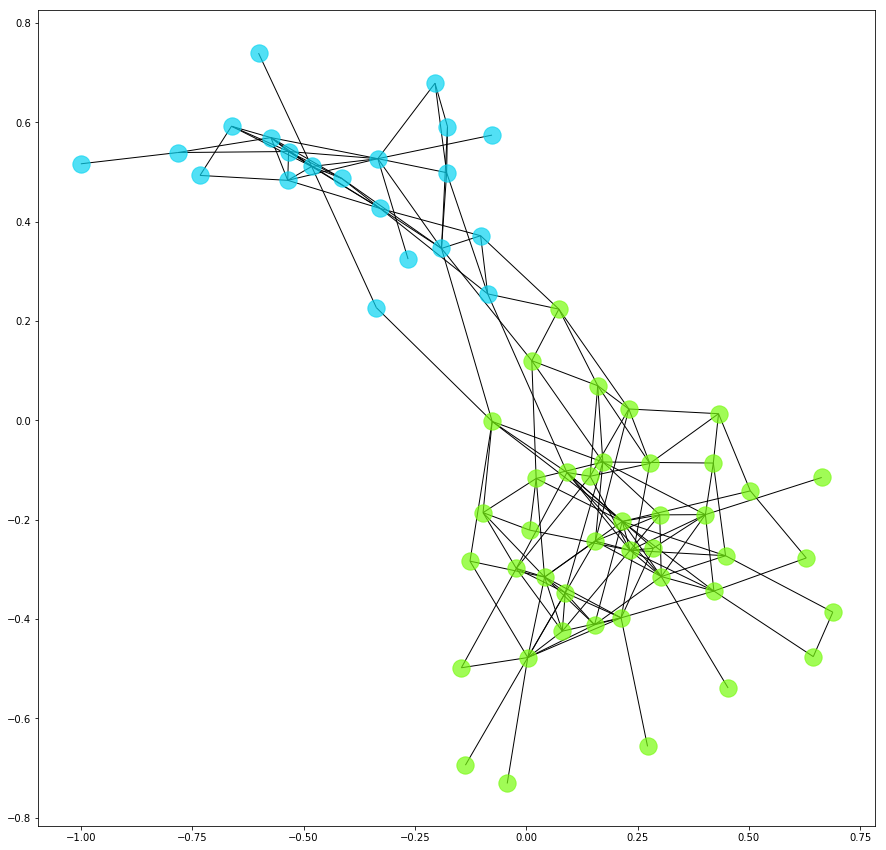

In [85]:
from matplotlib.pyplot import figure
import numpy

figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

In [86]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
communities_gmc = greedy_modularity_communities(G)

communities_sum = 0

for community_gmc in communities_gmc:
    communities_sum += 1
    print("Community ", communities_sum)
    print(community_gmc)
    print("Liczność community: ", len(community_gmc), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
frozenset({'41', '50', '35', '3', '51', '21', '44', '34', '45', '47', '17', '11', '62', '53', '13', '1', '39', '54', '15', '38', '43', '59', '48'})
Liczność community:  23 

Community  2
frozenset({'61', '26', '8', '57', '2', '14', '10', '29', '23', '28', '55', '18', '42', '32', '27', '6', '20', '49', '58', '33', '31', '7'})
Liczność community:  22 

Community  3
frozenset({'25', '52', '56', '4', '19', '9', '12', '16', '30', '60', '36', '24', '5', '22', '46'})
Liczność community:  15 

Community  4
frozenset({'37', '40'})
Liczność community:  2 

Znaleziono communities:  4


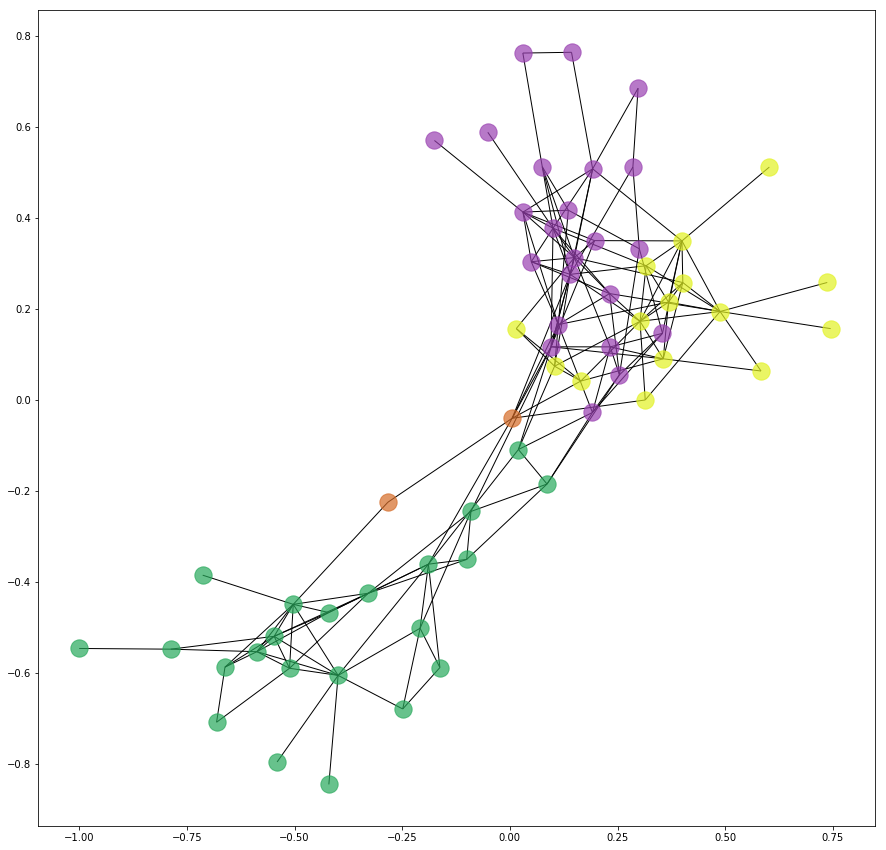

In [87]:
figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in communities_gmc:
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()